In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import random

In [3]:
X = ['']*60
Y = ['']*60

In [4]:
for i in range(0,20):
    X[i] = open('/Users/elvis/Downloads/hw4-1/languageID/e' + str(i) + '.txt','r').read()
    X[i+20] = open('/Users/elvis/Downloads/hw4-1/languageID/j' + str(i) + '.txt','r').read()
    X[i+40] = open('/Users/elvis/Downloads/hw4-1/languageID/s' + str(i) + '.txt','r').read()
    Y[i] = 'e'
    Y[i+20] = 'j'
    Y[i+40] = 's'

# Problem 2.1

In [5]:
def Prior(lang_target, text, langs):
    count = 0
    for i in langs:
        if i == lang_target:
            count = count + 1
    prior_calc = (count + 0.5)/(len(langs) + 3*0.5)
    return(prior_calc)


In [6]:
e_prior = Prior('e', X[:10] + X[20:30] + X[40:50], Y[:10] + Y[20:30] + Y[40:50])
j_prior = Prior('j', X[:10] + X[20:30] + X[40:50], Y[:10] + Y[20:30] + Y[40:50])
s_prior = Prior('s', X[:10] + X[20:30] + X[40:50], Y[:10] + Y[20:30] + Y[40:50])

In [7]:
print("P(Y = e) = " + str(e_prior) + "\nP(Y = j) = " + str(j_prior) + "\nP(Y = s) = " + str(s_prior))

P(Y = e) = 0.3333333333333333
P(Y = j) = 0.3333333333333333
P(Y = s) = 0.3333333333333333


# Problem 2.2

In [13]:
def Theta_vec(text, langs):
    count = [0]*27
    theta = [0.0]*27
    theta_corrected = [0.0]*27
    for i in text:
        for j in i:
            if j == 'a':
                count[0] = count[0] + 1
            if j == 'b':
                count[1] = count[1] + 1
            if j == 'c':
                count[2] = count[2] + 1
            if j == 'd':
                count[3] = count[3] + 1
            if j == 'e':
                count[4] = count[4] + 1
            if j == 'f':
                count[5] = count[5] + 1
            if j == 'g':
                count[6] = count[6] + 1
            if j == 'h':
                count[7] = count[7] + 1
            if j == 'i':
                count[8] = count[8] + 1
            if j == 'j':
                count[9] = count[9] + 1
            if j == 'k':
                count[10] = count[10] + 1
            if j == 'l':
                count[11] = count[11] + 1
            if j == 'm':
                count[12] = count[12] + 1
            if j == 'n':
                count[13] = count[13] + 1
            if j == 'o':
                count[14] = count[14] + 1
            if j == 'p':
                count[15] = count[15] + 1
            if j == 'q':
                count[16] = count[16] + 1
            if j == 'r':
                count[17] = count[17] + 1
            if j == 's':
                count[18] = count[18] + 1
            if j == 't':
                count[19] = count[19] + 1
            if j == 'u':
                count[20] = count[20] + 1
            if j == 'v':
                count[21] = count[21] + 1
            if j == 'w':
                count[22] = count[22] + 1
            if j == 'x':
                count[23] = count[23] + 1
            if j == 'y':
                count[24] = count[24] + 1
            if j == 'z':
                count[25] = count[25] + 1
            if j == ' ':
                count[26] = count[26] + 1
    for i in range(0,27):
        theta[i] = count[i]/sum(count)
        theta_corrected[i] = (count[i]+0.5)/(sum(count) + 27*0.5)
    return(theta_corrected)

In [14]:
e_theta = Theta_vec(X[:10], Y[:10])
print("The multinomial parameter vector for English is:\n" + str(np.round(e_theta, 3)))

The multinomial parameter vector for English is:
[0.06  0.011 0.022 0.022 0.105 0.019 0.017 0.047 0.055 0.001 0.004 0.029
 0.021 0.058 0.064 0.017 0.001 0.054 0.066 0.08  0.027 0.009 0.015 0.001
 0.014 0.001 0.179]


# Problem 2.3

In [15]:
j_theta = Theta_vec(X[20:30], Y[:10])
print("The multinomial parameter vector for Japanese is:\n" + str(np.round(j_theta, 3)))

The multinomial parameter vector for Japanese is:
[0.132 0.011 0.005 0.017 0.06  0.004 0.014 0.032 0.097 0.002 0.057 0.001
 0.04  0.057 0.091 0.001 0.    0.043 0.042 0.057 0.071 0.    0.02  0.
 0.014 0.008 0.123]


In [16]:
s_theta = Theta_vec(X[40:50], Y[:10])
print("The multinomial parameter vector for Spanish is:\n" + str(np.round(s_theta, 3)))

The multinomial parameter vector for Spanish is:
[0.105 0.008 0.038 0.04  0.114 0.009 0.007 0.005 0.05  0.007 0.    0.053
 0.026 0.054 0.072 0.024 0.008 0.059 0.066 0.036 0.034 0.006 0.    0.002
 0.008 0.003 0.168]


# Problem 2.4

In [17]:
def Count_vec(text, langs):
    count = [0]*27
    for i in text:
        for j in i:
            if j == 'a':
                count[0] = count[0] + 1
            if j == 'b':
                count[1] = count[1] + 1
            if j == 'c':
                count[2] = count[2] + 1
            if j == 'd':
                count[3] = count[3] + 1
            if j == 'e':
                count[4] = count[4] + 1
            if j == 'f':
                count[5] = count[5] + 1
            if j == 'g':
                count[6] = count[6] + 1
            if j == 'h':
                count[7] = count[7] + 1
            if j == 'i':
                count[8] = count[8] + 1
            if j == 'j':
                count[9] = count[9] + 1
            if j == 'k':
                count[10] = count[10] + 1
            if j == 'l':
                count[11] = count[11] + 1
            if j == 'm':
                count[12] = count[12] + 1
            if j == 'n':
                count[13] = count[13] + 1
            if j == 'o':
                count[14] = count[14] + 1
            if j == 'p':
                count[15] = count[15] + 1
            if j == 'q':
                count[16] = count[16] + 1
            if j == 'r':
                count[17] = count[17] + 1
            if j == 's':
                count[18] = count[18] + 1
            if j == 't':
                count[19] = count[19] + 1
            if j == 'u':
                count[20] = count[20] + 1
            if j == 'v':
                count[21] = count[21] + 1
            if j == 'w':
                count[22] = count[22] + 1
            if j == 'x':
                count[23] = count[23] + 1
            if j == 'y':
                count[24] = count[24] + 1
            if j == 'z':
                count[25] = count[25] + 1
            if j == ' ':
                count[26] = count[26] + 1
    return(count)

In [18]:
e_10_count_vec = Count_vec(X[11], Y[11])
print("The bag-of-words vector count for e10.txt is:\n" + str(e_10_count_vec))

The bag-of-words vector count for e10.txt is:
[199, 47, 70, 86, 352, 78, 47, 143, 170, 1, 15, 124, 59, 191, 236, 38, 3, 147, 194, 272, 86, 35, 57, 2, 43, 2, 618]


# Problem 2.5

In [19]:
def prob_given_prior(word_bag):
    summed = [0.0, 0.0, 0.0]
    summed[0] = sum(np.nan_to_num(word_bag*np.log(e_theta),  posinf=np.inf, neginf=-np.inf))
    summed[1] = sum(np.nan_to_num(word_bag*np.log(j_theta),  posinf=np.inf, neginf=-np.inf))
    summed[2] = sum(np.nan_to_num(word_bag*np.log(s_theta),  posinf=np.inf, neginf=-np.inf))
    return(summed)

In [20]:
def prob_given_prior(word_bag):
    summed = [0.0, 0.0, 0.0]
    summed[0] = sum(np.nan_to_num(word_bag*np.log(e_theta),  posinf=0, neginf=0))
    summed[1] = sum(np.nan_to_num(word_bag*np.log(j_theta),  posinf=0, neginf=0))
    summed[2] = sum(np.nan_to_num(word_bag*np.log(s_theta),  posinf=0, neginf=0))
    return(summed)

In [21]:
e_10_prob = prob_given_prior(e_10_count_vec)

In [22]:
print("The log[p(x|y=e)] is: " + str(np.round(e_10_prob[0], 3)) + "\nThe log[p(x|y=j)] is: " + 
str(np.round(e_10_prob[1], 3)) + "\nThe log[p(x|y=s)] is: " + 
str(np.round(e_10_prob[2], 3)))

The log[p(x|y=e)] is: -9346.212
The log[p(x|y=j)] is: -10407.284
The log[p(x|y=s)] is: -10056.252


# Problem 2.6

In [23]:
def predict_lang(prob_dist):
    lang_type = ' '
    max_index = prob_dist.index(np.max(prob_dist))
    if max_index == 0:
        lang_type = 'e'
    elif max_index == 1:
        lang_type = 'j'
    elif max_index == 2:
        lang_type = 's'
    return(lang_type)

In [24]:
e_10_pred = predict_lang(e_10_prob)

In [34]:
print("The log[p(x|y=e)] is: " + str(np.round(e_10_prob[0]/3, 3)) + "\nThe log[p(x|y=j)] is: " + 
str(np.round(e_10_prob[1]/3, 3)) + "\nThe log[p(x|y=s)] is: " + 
str(np.round(e_10_prob[2]/3, 3)))

The log[p(x|y=e)] is: -3115.404
The log[p(x|y=j)] is: -3469.095
The log[p(x|y=s)] is: -3352.084


In [25]:
print("e10.txt is classified as: " + str(e_10_pred))

e10.txt is classified as: e


# Problem 2.7

In [26]:
def predict_from_text(text, langs):
    text_vec = Count_vec(text, langs)
    text_prob = prob_given_prior(text_vec)
    text_pred = predict_lang(text_prob)
    return(text_pred)

In [27]:
Y_pred = ['']*60
for i in range(0,60):
    Y_pred[i] = predict_from_text(X[i], Y[i])

In [29]:
confusion_matrix(Y[10:20]+Y[30:40]+Y[50:60], Y_pred[10:20]+Y_pred[30:40]+Y_pred[50:60])

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

# Problem 2.8

In [30]:
shuffled_e10 = ''.join(random.sample(X[10], len(X[10])))

In [31]:
shuffled_e10_pred = predict_from_text(shuffled_e10, Y[10])

In [32]:
print("After shuffling e10.txt, the shuffled text was classified correctly as: " + shuffled_e10_pred)

After shuffling e10.txt, the shuffled text was classified correctly as: e


In [33]:
print("Suffling does not change the classification as our model uses the distribution of letters to determine language, regardless of order.")

Suffling does not change the classification as our model uses the distribution of letters to determine language, regardless of order.


# Problem 3.2

In [36]:
import numpy as np 
import pandas as pd 

import torch
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import random_split, DataLoader
from torchvision.utils import make_grid

In [331]:
mnist_trainset = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='data', train=False, download=True, transform=transforms.ToTensor())

In [442]:
batch_size = 128
train_loader = DataLoader(mnist_trainset, batch_size, shuffle=True, num_workers=4, pin_memory=True)

alpha = 0.01

In [630]:
for batch in train_loader:
    imag, labl = batch

In [370]:
w1 = np.matrix(np.zeros((784, 300), dtype = np.float64))
w2 = np.matrix(np.zeros((300, 200), dtype = np.float64))
w3 = np.matrix(np.zeros((200, 10), dtype = np.float64))

In [438]:
np.argmax(np.asarray(np.exp((sigmoid((sigmoid(((mnist_trainset[10000][0][0].reshape(-1,784).numpy())@w1)))@w2))@w3)).reshape(-1))

0

In [440]:
imag, lable = mnist_trainset[10]

In [441]:
imag.shape

torch.Size([1, 28, 28])

In [372]:
def sigmoid(z):
    sigma = 1/(1+np.exp(z))
    return(sigma)

In [431]:
def mynn_probs(train_in):
    probs_out = np.asarray(np.exp((sigmoid((sigmoid(((train_in.reshape(-1,784).numpy())@w1)))@w2))@w3)).reshape(-1)
    return(probs_out)


In [476]:
def training(train_in_1, label_1):
    z1 = (train_in_1.reshape(-1,784).numpy())@w1
    z2 = (sigmoid(((train_in_1.reshape(-1,784).numpy())@w1)))@w2
    z3 = sigmoid((sigmoid(((train_in_1.reshape(-1,784).numpy())@w1)))@w2)@w3
    y_hat = np.argmax(mynn_probs(train_in_1))
    dL_dz3 = np.array(y_hat - label_1)
    dL_dw3 = dL_dz3*(sigmoid(z2))
    print(z1.shape, (1-sigmoid(z2)).shape, z3.shape)
    dL_dw2 = (sigmoid(z1).T@(1-sigmoid(z2))).T@z3*dL_dz3
    dL_dw1 = (train_in_1.reshape(-1,784).numpy())@(1-sigmoid(z1))@z2@(1-sigmoid(z2))@z3*dL_dz3
    w3_n = w3 - alpha*dL_dw3
    w2_n = w2 - alpha*dL_dw2
    w1_n = w1 - alpha*dL_dw1
    return(y_hat, w3_n, w2_n, w1_n)

In [477]:
training(mnist_trainset[10000][0][0], 4)

(1, 300) (1, 200) (1, 10)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 300)

In [465]:
mynn_probs(mnist_trainset[10000][0][0])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Problem 3.3

In [478]:
import numpy as np 
import pandas as pd 

import torch
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import random_split, DataLoader
from torchvision.utils import make_grid

In [479]:
mnist_trainset = datasets.MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='data', train=False, download=True, transform=transforms.ToTensor())

In [480]:
input_size = 784
hidden_size1 = 300
hidden_size2 = 200
num_classes = 10

In [483]:
class mynnmodel(nn.Module):
       def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super().__init__()
        # hidden layer 1
        self.linear1 = nn.Linear(input_size, hidden_size1)
        # hidden layer 2
        self.linear2 = nn.Linear(hidden_size1, hidden_size2)
        # output layer
        self.linear_output = nn.Linear(hidden_size2, num_classes)

        def forward(self, xb):
            xb = xb.reshape(-1, 784) # -1 so that it will work for different batch sizes
            # Get intermediate outputs using hidden layer
            out = self.linear1(xb)
            # Apply activation function
            out = F.sigmoid(out)
            # Get predictions using output layer
            out = self.linear2(out)

            out = F.sigmoid(out)

            out = self.linear_output(out)
            return out

In [603]:
train, validation = random_split(mnist_trainset, [59000, 1000])

In [604]:
batch_size = 128

# shuffle so that batches in each epoch are different, and this randomization helps generalize and speed up training
train_loader = DataLoader(train, batch_size, shuffle=True, num_workers=4, pin_memory=True)
# val is only used for evaluating the model, so no need to shuffle
val_loader = DataLoader(validation, batch_size*2, num_workers=4, pin_memory=True)

In [605]:
input_size = 28*28 # 784 weights to train, 1 for each pixel
hidden_size1 = 300
hidden_size2 = 200
num_classes = 10 # 10 outputs, 10 biases

In [606]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) # probs shape is (128, 10), apply max to 10 class dim; max returns largest element and index of it
    return torch.tensor(torch.sum(preds == labels).item() / len(preds)), preds

In [607]:
class Mnistnnmodel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super().__init__()
        # hidden layer 1
        self.linear1 = nn.Linear(input_size, hidden_size1)
        # hidden layer 2
        self.linear2 = nn.Linear(hidden_size1, hidden_size2)
        # output layer
        self.linear_output = nn.Linear(hidden_size2, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784) # -1 so that it will work for different batch sizes
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.sigmoid(out)
        # Get predictions using output layer
        out = self.linear2(out)

        out = F.sigmoid(out)

        out = self.linear_output(out)
        return out
    
    def training_step(self, batch):
        images,labels = batch
        out = self(images)                            # generate predictions
        loss = F.cross_entropy(out, labels)           # compute loss
        acc,preds = accuracy(out, labels)             # calculate accuracy
        return {'train_loss': loss, 'train_acc':acc}
    
    def train_epoch_end(self, outputs):
        batch_losses = [x['train_loss'] for x in outputs]   # get all the batches loss
        epoch_loss = torch.stack(batch_losses).mean()       # combine losses
        batch_accs = [x['train_acc'] for x in outputs]      # get all the batches acc
        epoch_acc = torch.stack(batch_accs).mean()          # combine accuracies
        return {'train_loss': epoch_loss.item(), 'train_acc': epoch_acc.item()}
    
    def validation_step(self, batch):
        images,labels = batch
        out = self(images)                       # generate predictions
        loss = F.cross_entropy(out, labels)      # compute loss
        acc,preds = accuracy(out, labels)        # calculate accuracy and get predictions
        return {'val_loss': loss.detach(), 'val_acc':acc, 'preds':preds, 'labels':labels} # detach extracts only the needed number, or other numbers will crowd memory
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]     # get all the batches loss
        epoch_loss = torch.stack(batch_losses).mean()       # combine losses
        batch_accs = [x['val_acc'] for x in outputs]        # get all the batches acc
        epoch_acc = torch.stack(batch_accs).mean()          # combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    # this is for printing out the results after each epoch
    def epoch_end(self, epoch, train_result, val_result):
        print('Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}'.format(epoch+1, train_result['train_loss'], train_result['train_acc'], val_result['val_loss'], val_result['val_acc']))

    def test_prediction(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()                           # combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()                              # combine accuracies
        batch_preds = [pred for x in outputs for pred in x['preds'].tolist()]   # combine predictions
        batch_labels = [lab for x in outputs for lab in x['labels'].tolist()]   # combine labels
        return {'test_loss': epoch_loss.item(), 'test_acc': epoch_acc.item(), 'test_preds': batch_preds, 'test_labels': batch_labels}  

In [608]:
def fit(model, train_loader, val_loader, epochs, lr, opt_func=torch.optim.SGD):
    history = {}
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        
        # Training phase
        train_outputs = []
        for batch in train_loader:
            outputs = model.training_step(batch)              # compute loss and accuracy
            loss = outputs['train_loss']                      # get loss
            train_outputs.append(outputs)
            loss.backward()                                   # compute gradients
            optimizer.step()                                  # update weights 
            optimizer.zero_grad()                             # reset gradients to zero
        train_results = model.train_epoch_end(train_outputs)  # get the train average loss and acc for each epoch
            
        # Validation phase
        val_results = evaluate(model, val_loader)
        
        # print results
        model.epoch_end(epoch, train_results, val_results)
                
        # save results to dictionary
        to_add = {'train_loss': train_results['train_loss'], 'train_acc': train_results['train_acc'],
                 'val_loss': val_results['val_loss'], 'val_acc': val_results['val_acc']}
        for key,val in to_add.items():
            if key in history:
                history[key].append(val)
            else:
                history[key] = [val]
                
    return history

In [609]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
device = get_default_device()
device

device(type='cpu')

In [610]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [611]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cpu


In [612]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device) # yield will stop here, perform other steps, and the resumes to the next loop/batch

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [613]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [614]:
# Hyperparameters
input_size = 784 #784
hidden_size = 128
lr = 0.1
num_epochs = 10

modelNN = Mnistnnmodel(input_size, hidden_size1, hidden_size2, num_classes=10)  
to_device(modelNN, device) # move model parameters to the same device

Mnistnnmodel(
  (linear1): Linear(in_features=784, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=200, bias=True)
  (linear_output): Linear(in_features=200, out_features=10, bias=True)
)

In [615]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader] # perform val for each batch
    return model.validation_epoch_end(outputs) 

In [616]:
history = fit(modelNN, train_loader, val_loader, num_epochs, lr)

Epoch [1], train_loss: 2.2760, train_acc: 0.1560, val_loss: 2.1665, val_acc: 0.2992
Epoch [2], train_loss: 1.5723, train_acc: 0.5081, val_loss: 1.0347, val_acc: 0.6767
Epoch [3], train_loss: 0.8024, train_acc: 0.7564, val_loss: 0.6739, val_acc: 0.7995
Epoch [4], train_loss: 0.5672, train_acc: 0.8357, val_loss: 0.5325, val_acc: 0.8471
Epoch [5], train_loss: 0.4617, train_acc: 0.8678, val_loss: 0.4653, val_acc: 0.8628
Epoch [6], train_loss: 0.4082, train_acc: 0.8839, val_loss: 0.4241, val_acc: 0.8771
Epoch [7], train_loss: 0.3772, train_acc: 0.8925, val_loss: 0.4130, val_acc: 0.8747
Epoch [8], train_loss: 0.3566, train_acc: 0.8978, val_loss: 0.4024, val_acc: 0.8786
Epoch [9], train_loss: 0.3411, train_acc: 0.9020, val_loss: 0.3769, val_acc: 0.8947
Epoch [10], train_loss: 0.3278, train_acc: 0.9065, val_loss: 0.3699, val_acc: 0.8954


In [618]:
def test_predict(model, test_loader):
    outputs = [model.validation_step(batch) for batch in test_loader] # perform testing for each batch
    results = model.test_prediction(outputs)                          # get the results
    print('test_loss: {:.4f}, test_acc: {:.4f}'.format(results['test_loss'], results['test_acc']))
    return results['test_preds'], results['test_labels']

In [619]:
test_loader = DataLoader(mnist_testset, batch_size=256)
preds,labels = test_predict(modelNN, test_loader)

test_loss: 0.3104, test_acc: 0.9095


# Keeping track as I change train size

Train 59,000: train--0.9065, test--0.9095
Train 50,000: train--0.9005, test--0.9059
Train 30,000: train--0.8626, test--0.8782
Train 10,000: train--0.5979, test--0.5416
Train 5,000: train--0.2121, test--0.0965
Train 1,000: train--0.1090, test--0.1037
Train 100: train--0.1500, test--0.1019

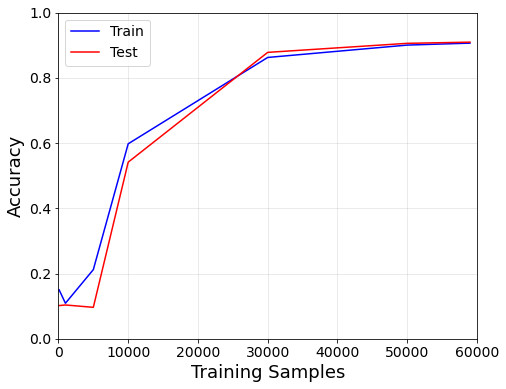

In [41]:
fig,ax=plt.subplots(1,figsize=(7.5,6), facecolor='white')
ax.grid(color='gray',axis='both',alpha=0.2)
ax.tick_params(left=True, bottom=True, labelleft = True, labelbottom=True, labelsize=14)

ax.set_xlabel('Training Samples', fontsize=18)
ax.set_ylabel('Accuracy', fontsize=18)
ax.set_xlim(0,60000)
ax.set_ylim(0,1)

plt.plot([100, 1000, 5000, 10000, 30000, 50000, 59000], [0.15, 0.109, 0.2121, 0.5979, 0.8626, 0.9005, 0.9065], label = "Train", color = "blue")
plt.plot([100, 1000, 5000, 10000, 30000, 50000, 59000], [0.1019, 0.1037, 0.0965, 0.5416, 0.8782, 0.9059, 0.9095], label = "Test", color = "red")

plt.legend(fontsize=14)

plt.savefig("/Users/elvis/Documents/Graduate/Courses/CS760/HW4/Problem 3.3.png", dpi=300, bbox_inches='tight')